In [1]:
%matplotlib inline

import numpy as np

from fussed_lasso import FusedLasso

# Demo

In [2]:
X = np.random.rand(20,2) 
y = np.array(range(20)) 
x = np.array([1.0,1.0]) 

model = FusedLasso()
model.fit(X,y)

model.predict(x)

7.4898445425356766

# Example

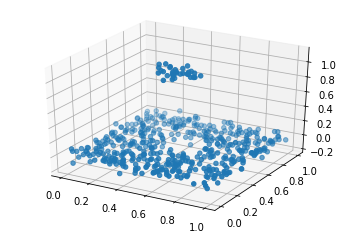

In [3]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

#Generate data
num = 500

X = np.random.rand(num,2)
X = X.astype('float32')
 
def f(x):
    center = np.array([0.5,0.5])
    y = np.sum((x- center)**2,1) 
    y = (y<0.02)
    return y.astype('float32')
epsilon = np.random.normal(loc=0.0, scale=0.05, size=num)
y = f(X) + epsilon

#Visualize data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

xs = X[:,0]
ys = X[:,1]
zs = y

ax.scatter(xs, ys, zs)

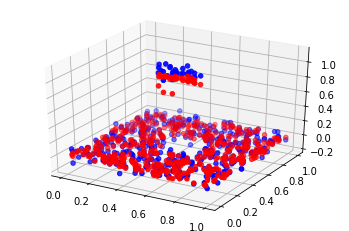

In [4]:
#Fitting our model
model = FusedLasso()
model.fit(X,y, alpha=0.1)

#Plot them together
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

xs = X[:,0]
ys = X[:,1]
zs = model.theta

ax.scatter(xs, ys, y,c='blue')
ax.scatter(xs, ys, zs,c='red')

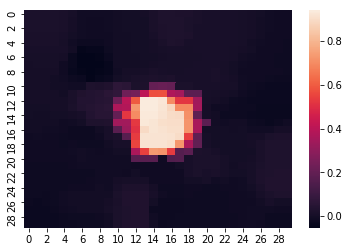

In [5]:
#Heatmap
import seaborn as sns

num = 30
XX = range(num)
YY = range(num)
xx, yy = np.meshgrid(XX, YY) 
pairs = np.vstack([ xx.reshape(-1), yy.reshape(-1) ]).T
heat_map = np.zeros( (num,num) )
for idx in pairs:
    val = np.array(idx)/num
    val = val.astype('float32') 
    y = model.predict(val)
    heat_map[idx[0],idx[1]] = y 
sns.heatmap(heat_map)